### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from ucimlrepo import fetch_ucirepo 

2025-02-20 07:41:41.277875: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 07:41:41.278661: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 07:41:41.281524: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 07:41:41.288996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740012101.302503   59807 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740012101.30

In [2]:
# fetch dataset dan menampilkan 5 baris pertama
auto_mpg = fetch_ucirepo(id=9) 
data = auto_mpg.data.original
data.head()

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


In [3]:
# Mengubah nama kolom
df = data.rename(columns={
        'car_name': 'Car Name',
        'displacement': 'Displacement',
        'cylinders': 'Cylinders',	
        'horsepower': 'Horsepower',
        'weight': 'Weight',
        'acceleration': 'Acceleration',	
        'model_year':'Model Year',
        'origin':'Origin',
        'mpg': 'MPG'
})
df.head()


,Car Name,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


In [4]:
# Melihat infomasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car Name      398 non-null    object 
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   MPG           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### Exploratory Data Analysis - Deskripsi Variabel


In [5]:
# Deskriptif statistik dari data
df.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [6]:
# Mengubah tipe data numerikal menjadi kategorikal pada kolom origin
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

### Menangani Missing Value


In [7]:
# Menjumlah missing value
df.isnull().sum()

Car Name        0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
MPG             0
dtype: int64

In [8]:
# Melihat baris yang terdapat mising value
df[df['Horsepower'].isna()]

,Car Name,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG
32,"ford,pinto",4,98.0,NaN,2046,19.0,71,USA,25.0
126,"ford,maverick",6,200.0,NaN,2875,17.0,74,USA,21.0
330,"renault,lecar,deluxe",4,85.0,NaN,1835,17.3,80,Europe,40.9
336,"ford,mustang,cobra",4,140.0,NaN,2905,14.3,80,USA,23.6
354,"renault,18i",4,100.0,NaN,2320,15.8,81,Europe,34.5
374,"amc,concord,dl",4,151.0,NaN,3035,20.5,82,USA,23.0


In [9]:
# Menghapus kolom yang terdapat missing value
df.dropna(inplace=True)

In [10]:
# Mengecheck kembali missing value
df.isnull().sum()

Car Name        0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
MPG             0
dtype: int64

In [11]:
# Check kolom yang bernilai 0
for column in df.columns:
    if column == 0:
        print(f'{column} has all 0 values')
    else:
        print(f'kolom {column} tidak memiliki 0 valus')

kolom Car Name tidak memiliki 0 valus
kolom Cylinders tidak memiliki 0 valus
kolom Displacement tidak memiliki 0 valus
kolom Horsepower tidak memiliki 0 valus
kolom Weight tidak memiliki 0 valus
kolom Acceleration tidak memiliki 0 valus
kolom Model Year tidak memiliki 0 valus
kolom Origin tidak memiliki 0 valus
kolom MPG tidak memiliki 0 valus


### Menangani Outliers


In [12]:
# Memisahkan tipe data kategorikal dan numerikal
def cat_num_col(df):
    num = []
    cat = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            num.append(column)
        else:
            cat.append(column)
    return num, cat

num_cols, cat_cols = cat_num_col(df)

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'MPG']
Categorical columns: ['Car Name', 'Origin']


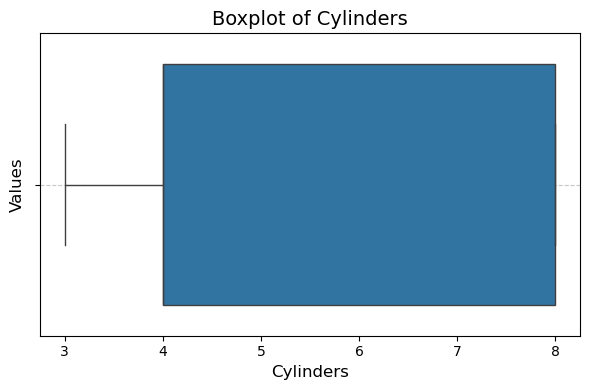

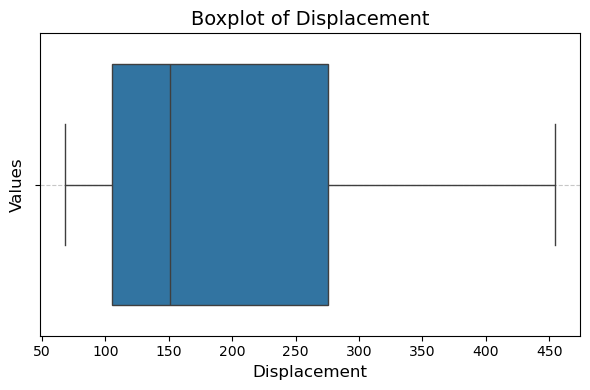

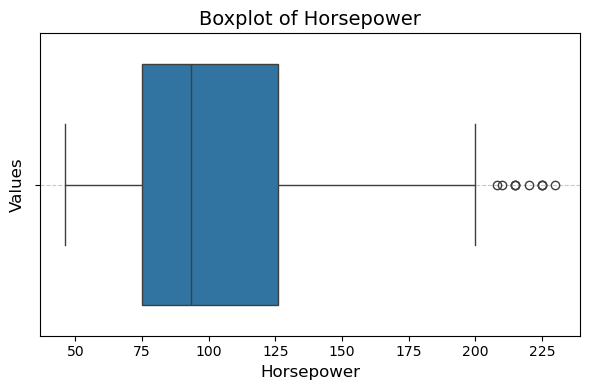

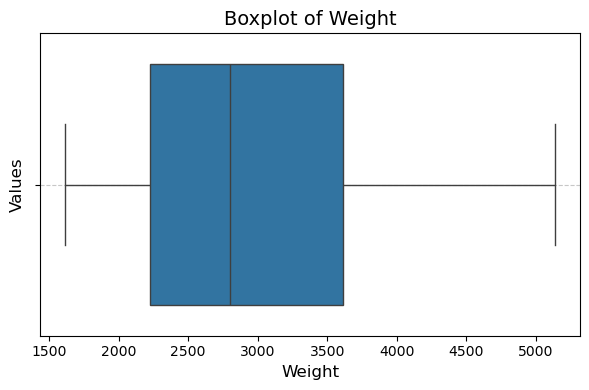

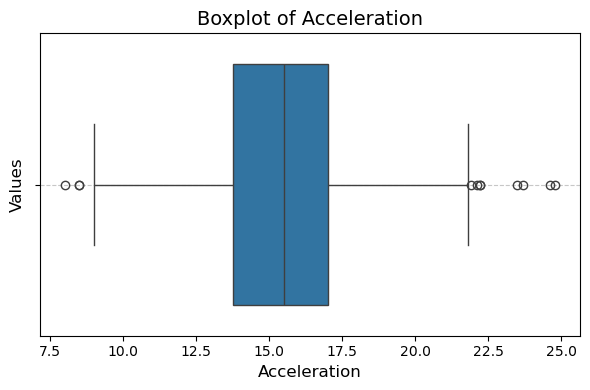

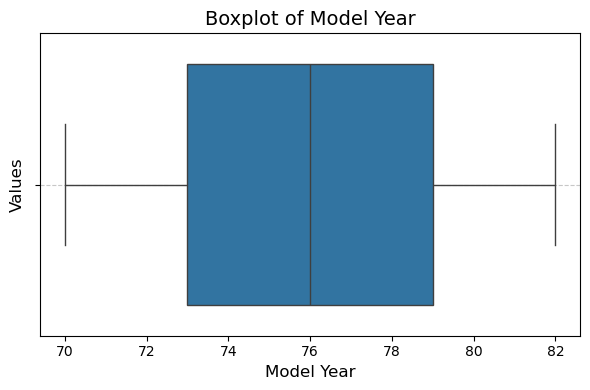

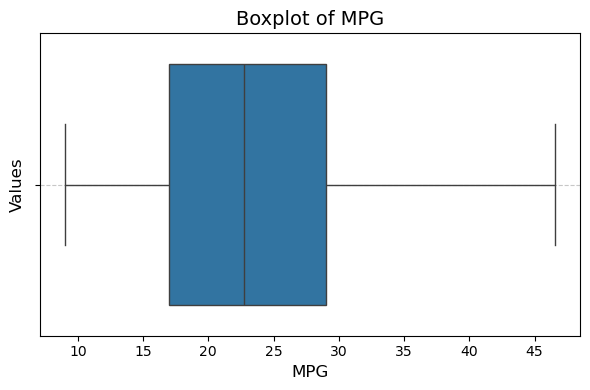

In [13]:
# Membuat boxplot untuk tipe data numerik untuk memeriksa outlier

def boxplot(columns):
    for column in columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=column)
        plt.title(f'Boxplot of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

boxplot(num_cols)

In [14]:
# Membuat fungsi handle outliers dan mengatasinya
def handle_outliers(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Ganti outlier dengan batas bawah atau atas
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

handle_outliers(df, num_cols)

,Car Name,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG
0,"chevrolet,chevelle,malibu",8.0,307.0,130.0,3504.0,12.0,70.0,USA,18.0
1,"buick,skylark,320",8.0,350.0,165.0,3693.0,11.5,70.0,USA,15.0
2,"plymouth,satellite",8.0,318.0,150.0,3436.0,11.0,70.0,USA,18.0
3,"amc,rebel,sst",8.0,304.0,150.0,3433.0,12.0,70.0,USA,16.0
4,"ford,torino",8.0,302.0,140.0,3449.0,10.5,70.0,USA,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4.0,140.0,86.0,2790.0,15.6,82.0,USA,27.0
394,"vw,pickup",4.0,97.0,52.0,2130.0,21.9,82.0,Europe,44.0
395,"dodge,rampage",4.0,135.0,84.0,2295.0,11.6,82.0,USA,32.0
396,"ford,ranger",4.0,120.0,79.0,2625.0,18.6,82.0,USA,28.0


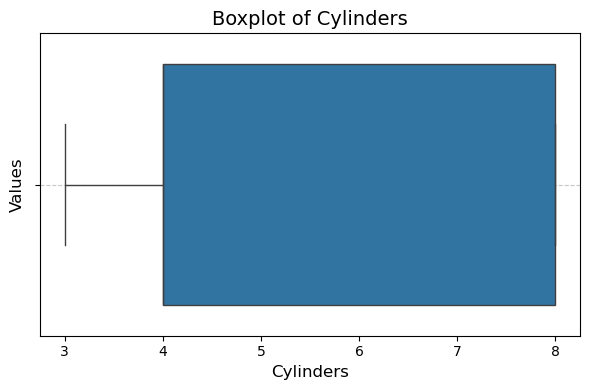

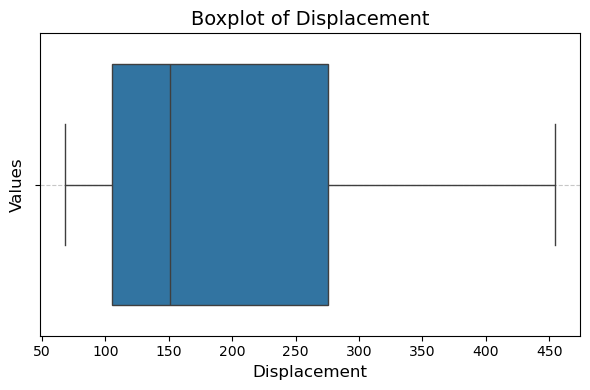

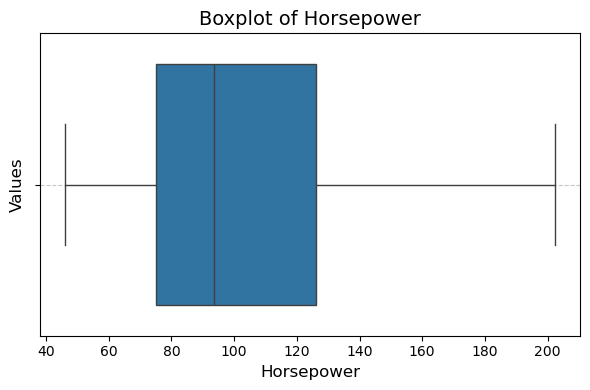

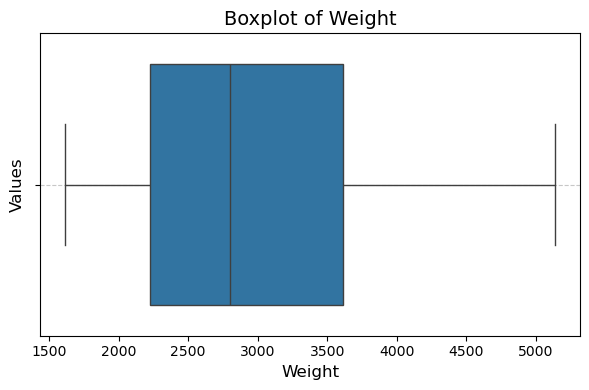

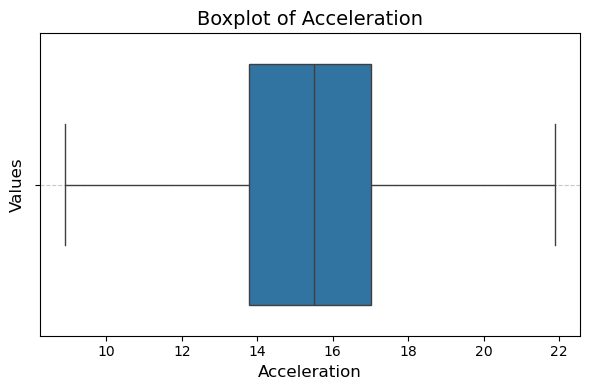

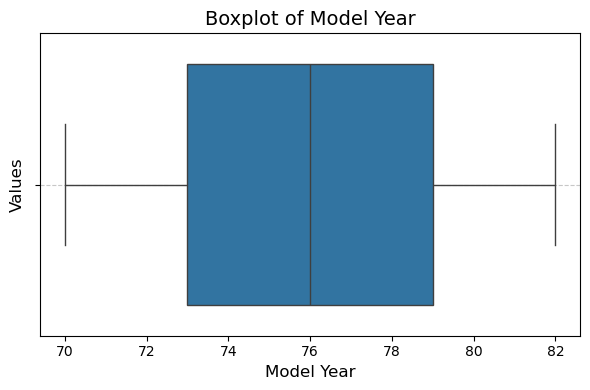

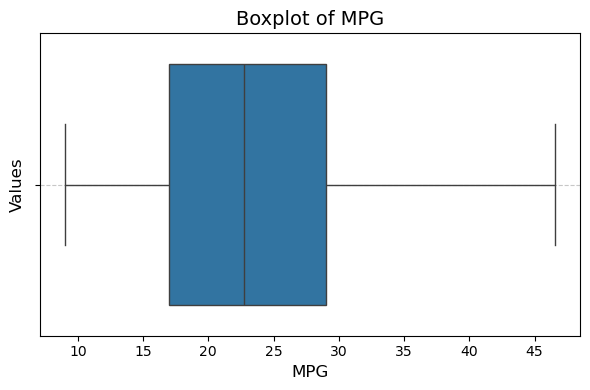

In [15]:
# Memeriksa kembali outliers
boxplot(num_cols)

### Univariate Analysis

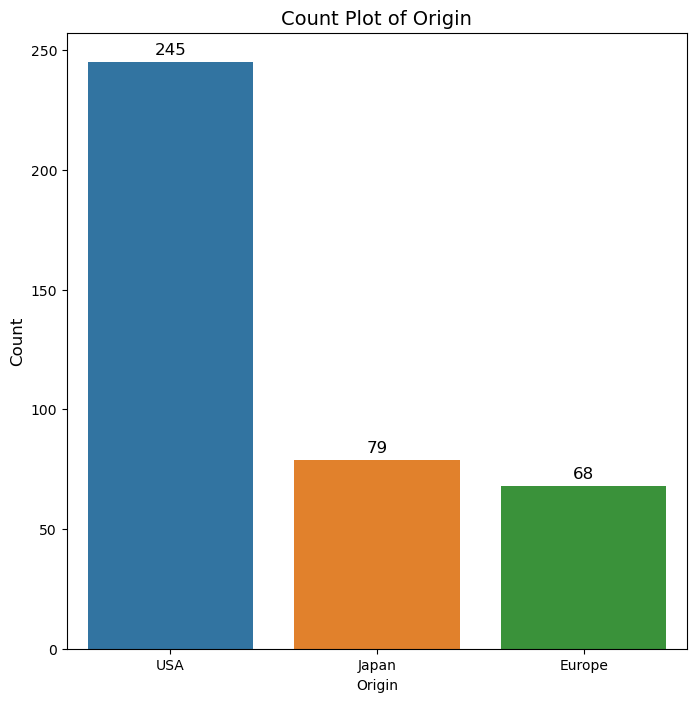

In [16]:
# Unvariate analysis pada kolom bertipe kategorical
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df, x='Origin', hue='Origin')

plt.title('Count Plot of Origin', fontsize=14)
plt.ylabel('Count', fontsize=12)

# Menambahkan label pada batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, label_type='edge', padding=3)

plt.show()

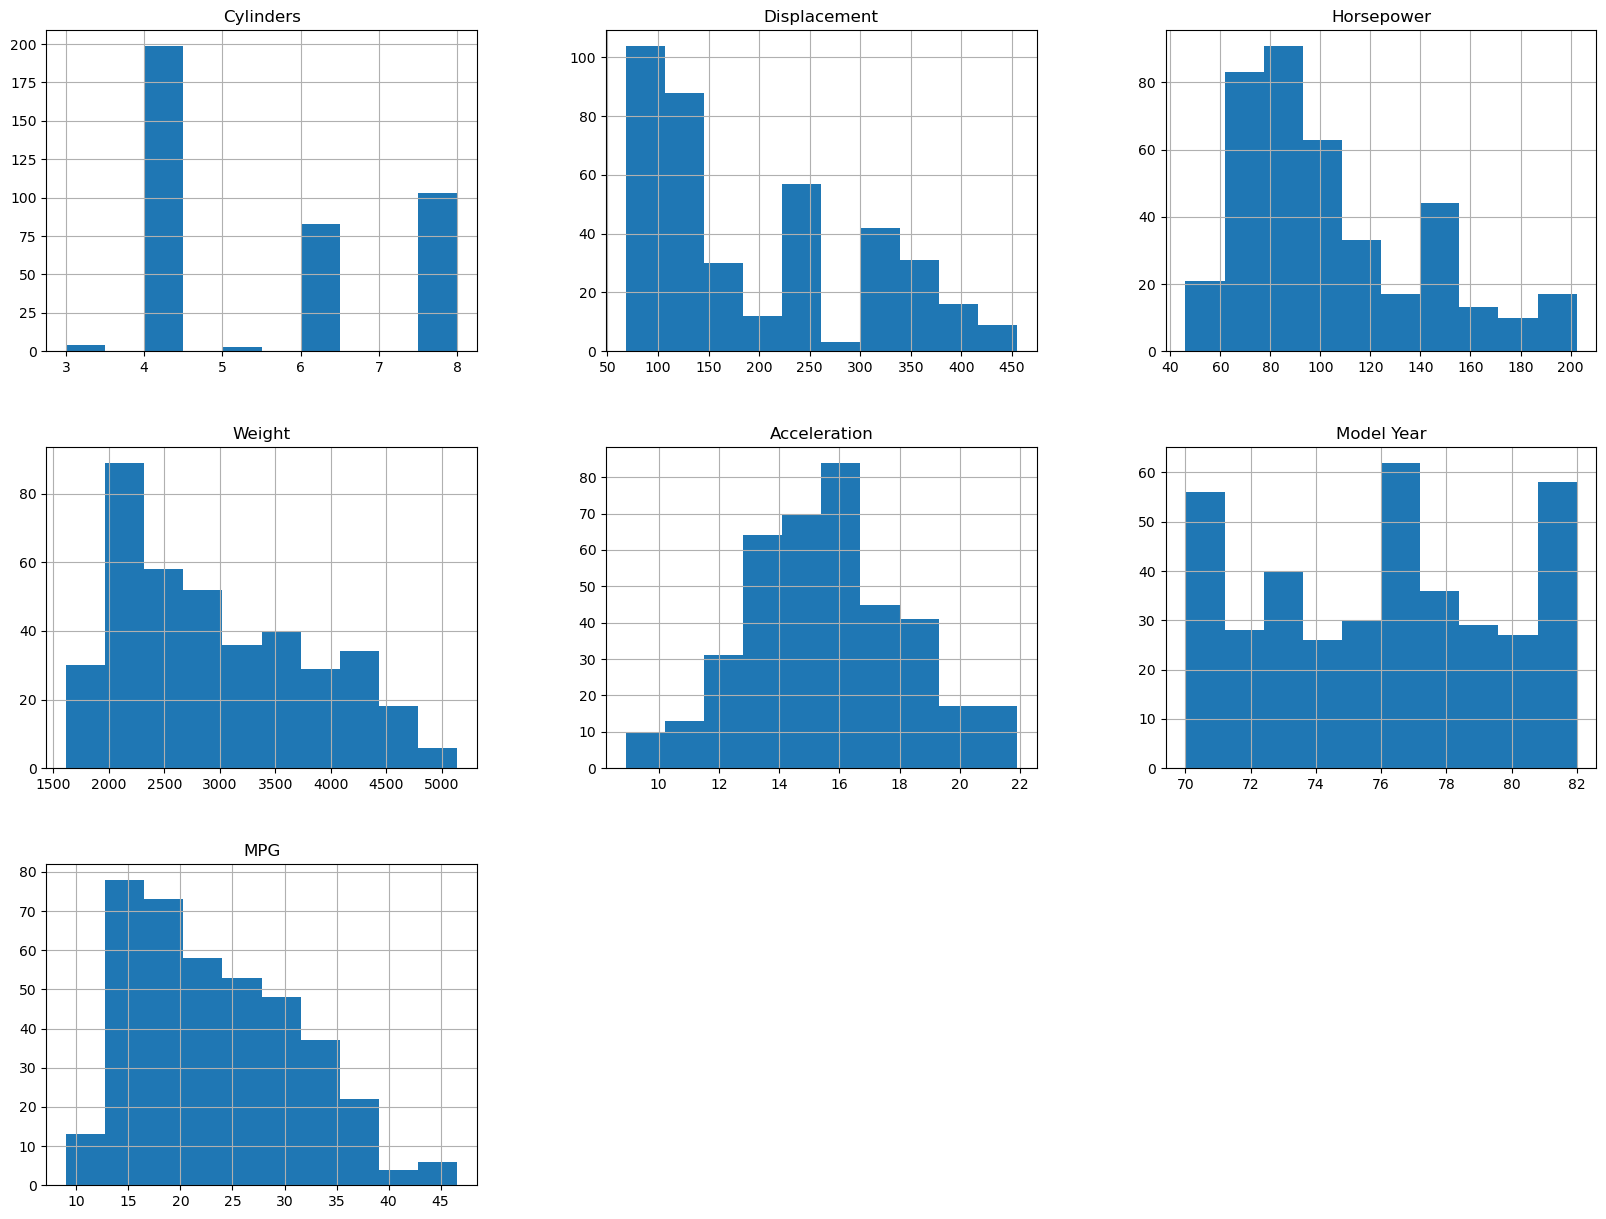

In [17]:
# Univariate Analysis pada kolom bertipe numerikal
df.hist(bins=10, figsize=(20,15))
plt.show()

### Multivariate Analysis

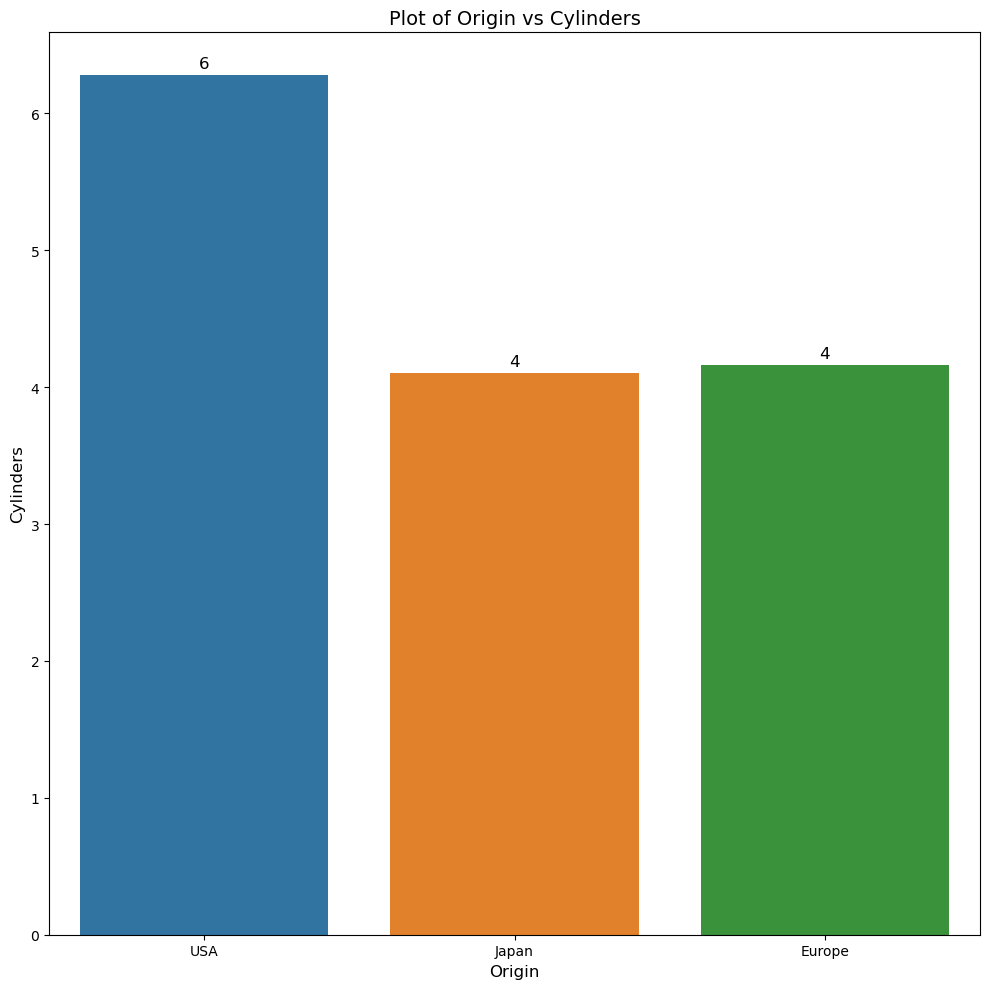

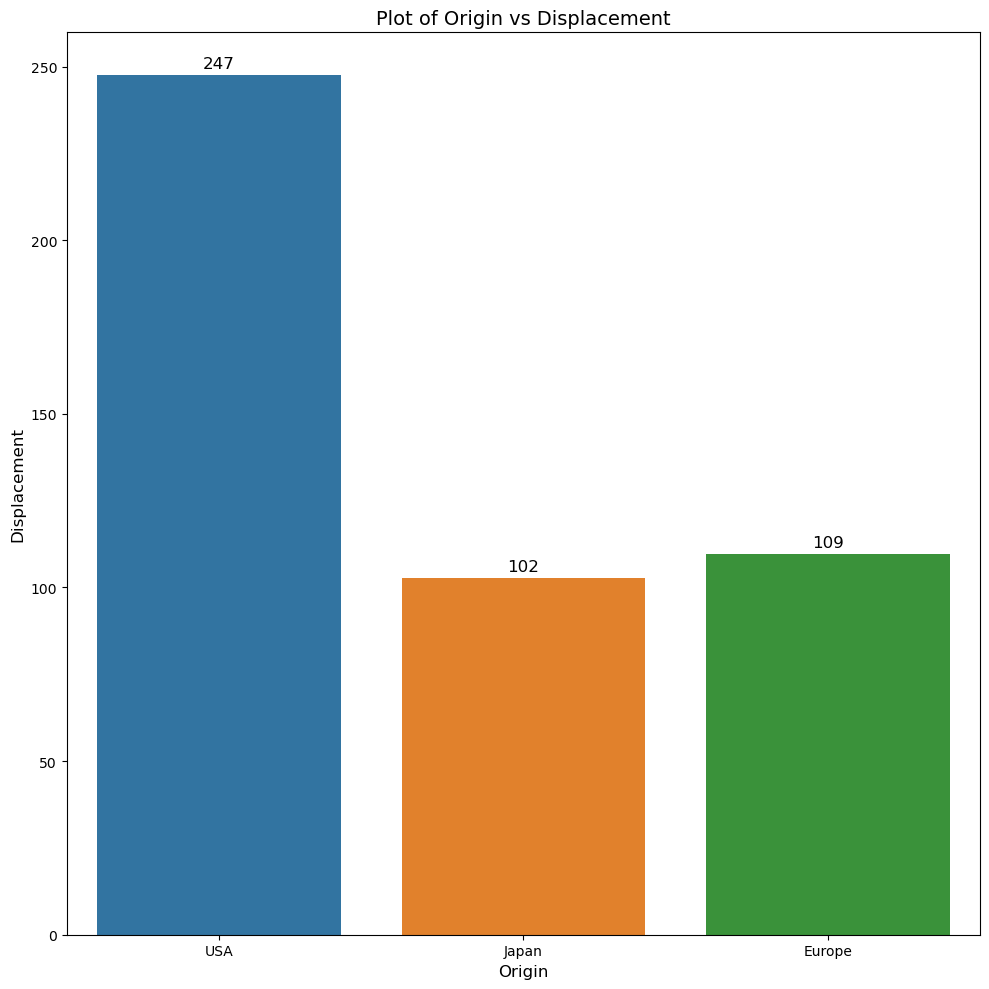

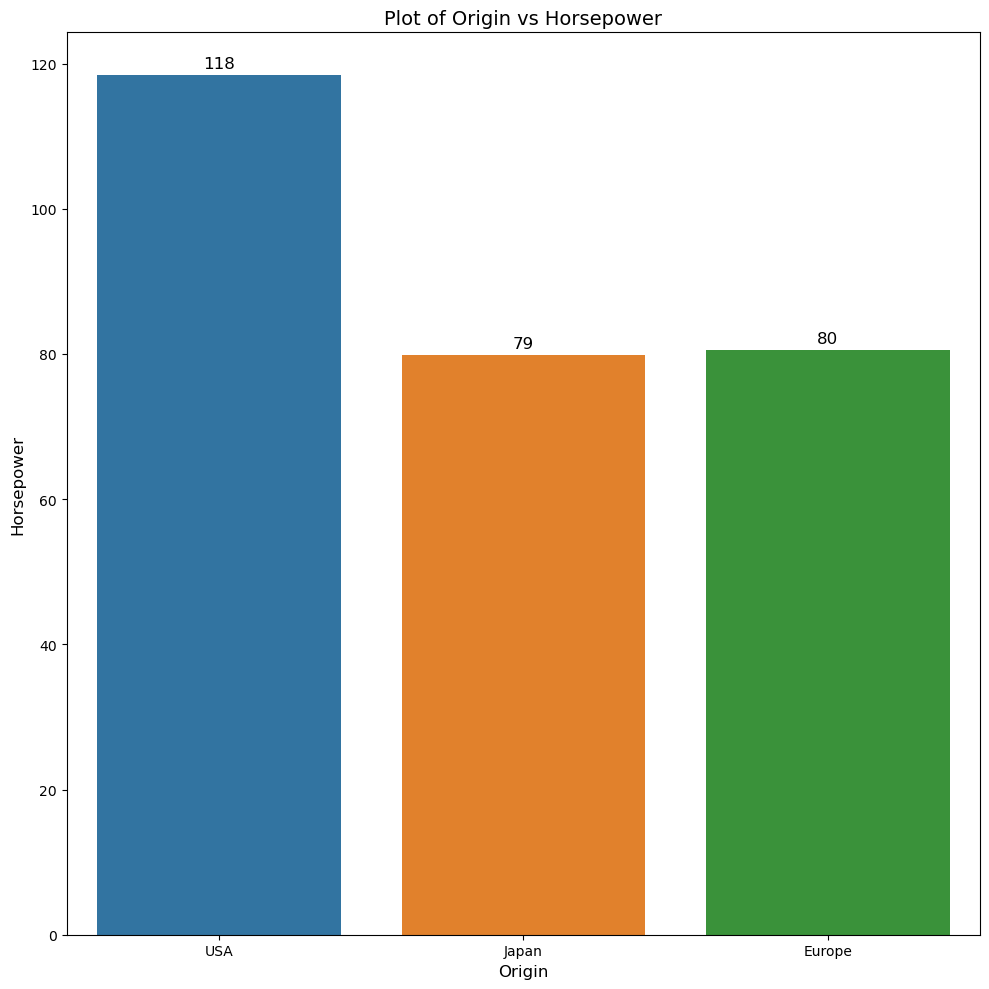

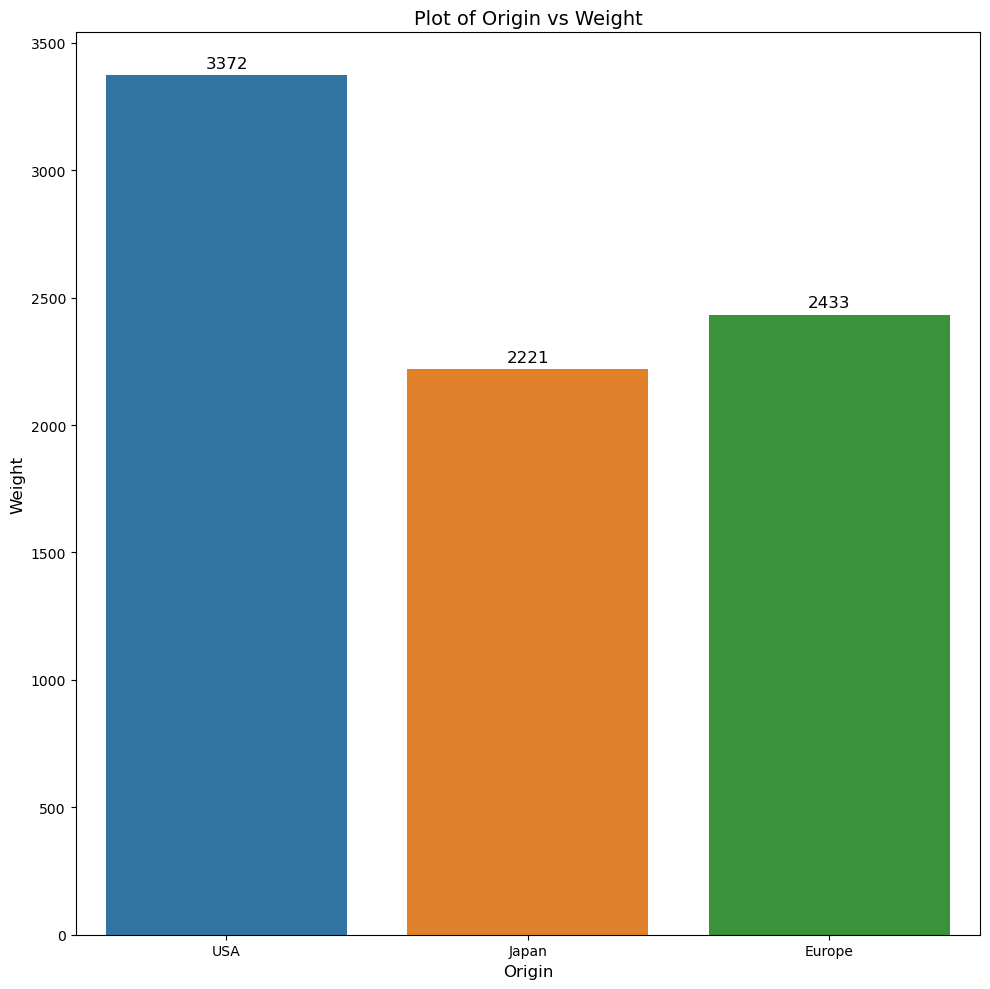

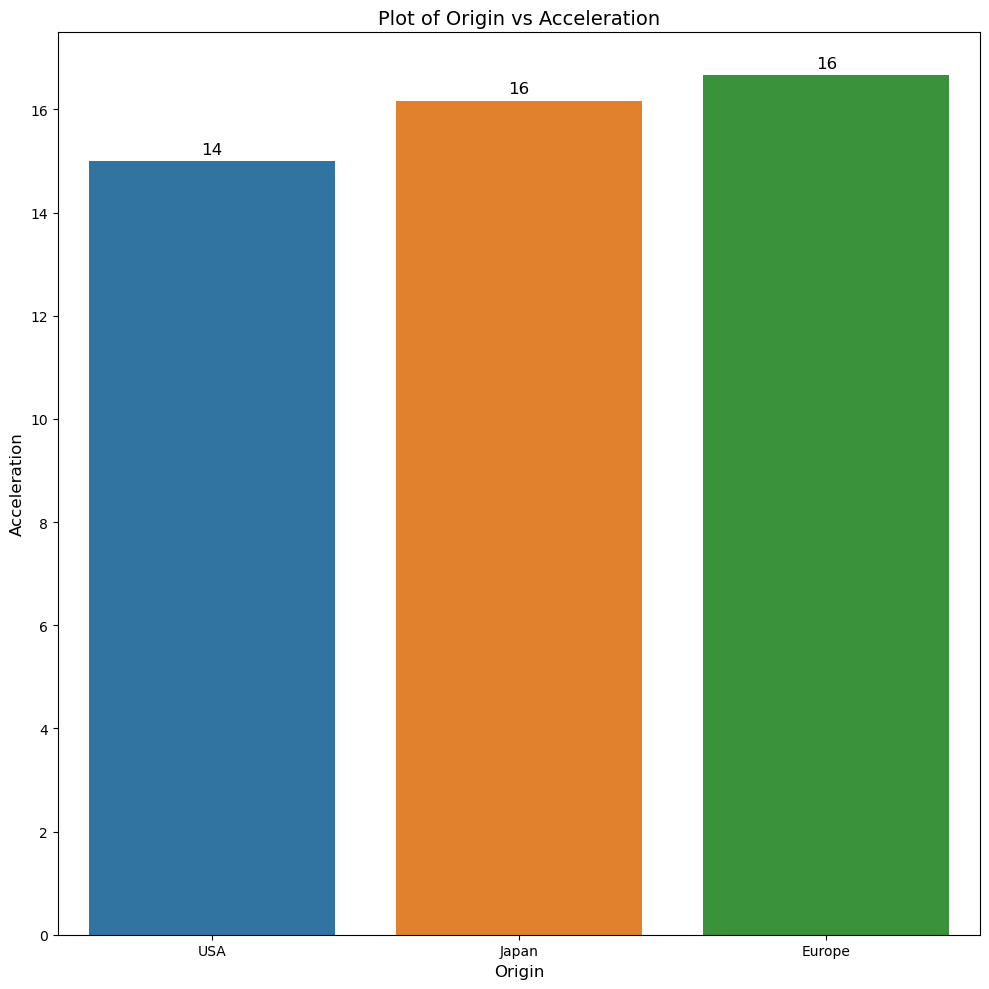

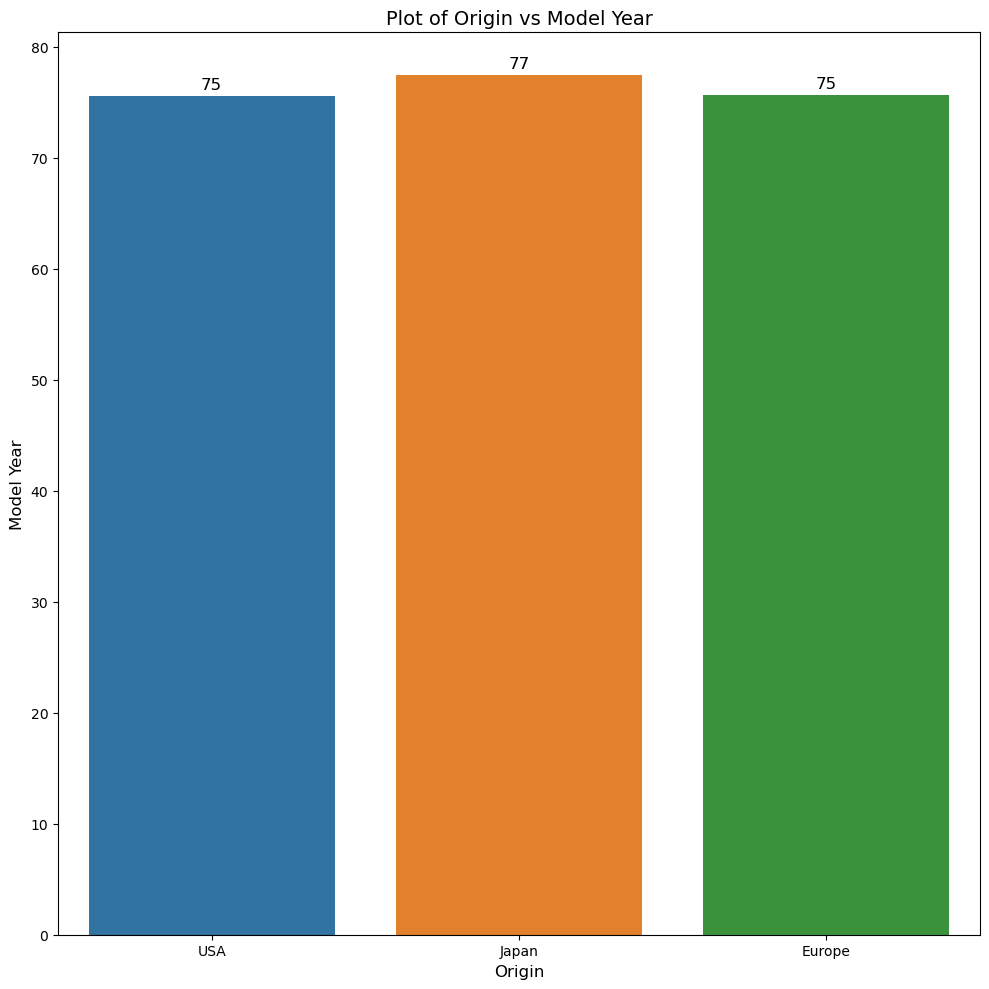

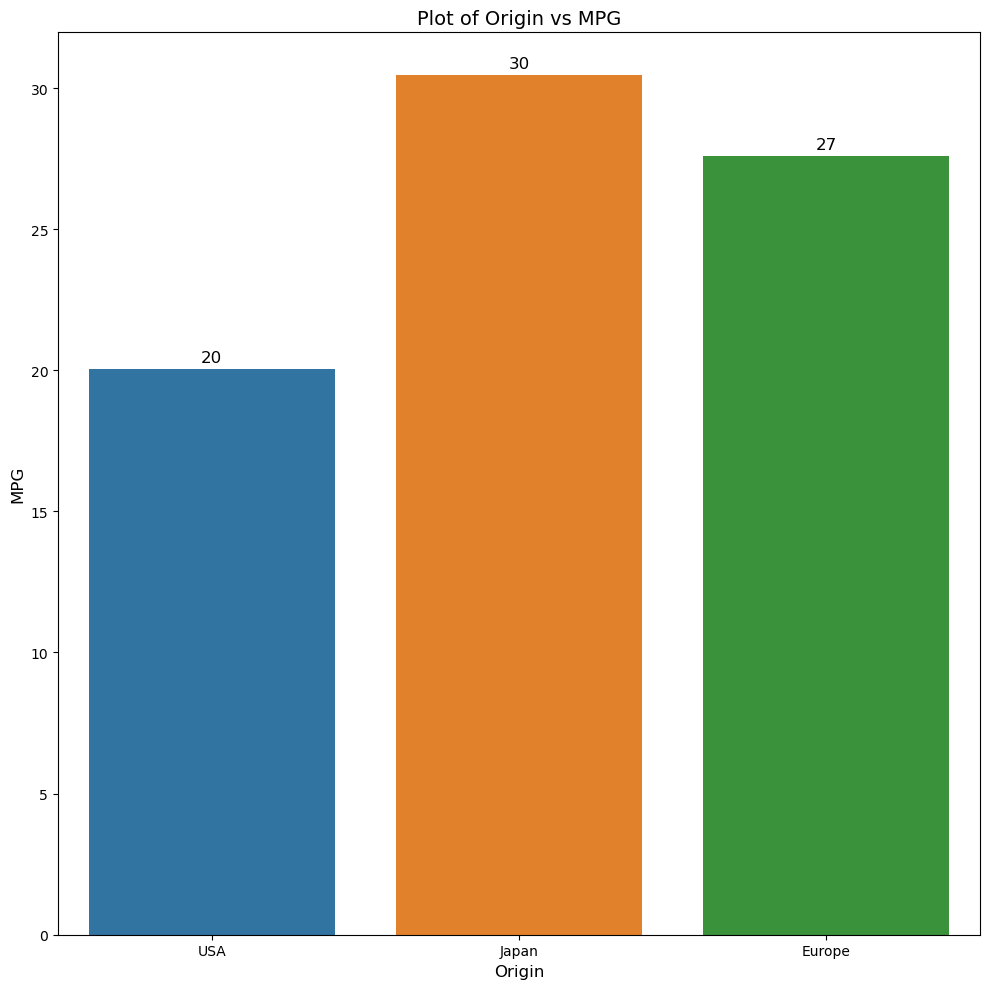

In [18]:
# Multivariate Analysis pada kolom bertipe data kategorical dengan numerikal
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 10))
        ax = sns.barplot(df, x='Origin', y=col, hue='Origin', errorbar=None)
        plt.title(f'Plot of Origin vs {col}', fontsize=14)
        plt.xlabel('Origin', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.tight_layout()
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', fontsize=12, label_type='edge', padding=3)
        plt.show()

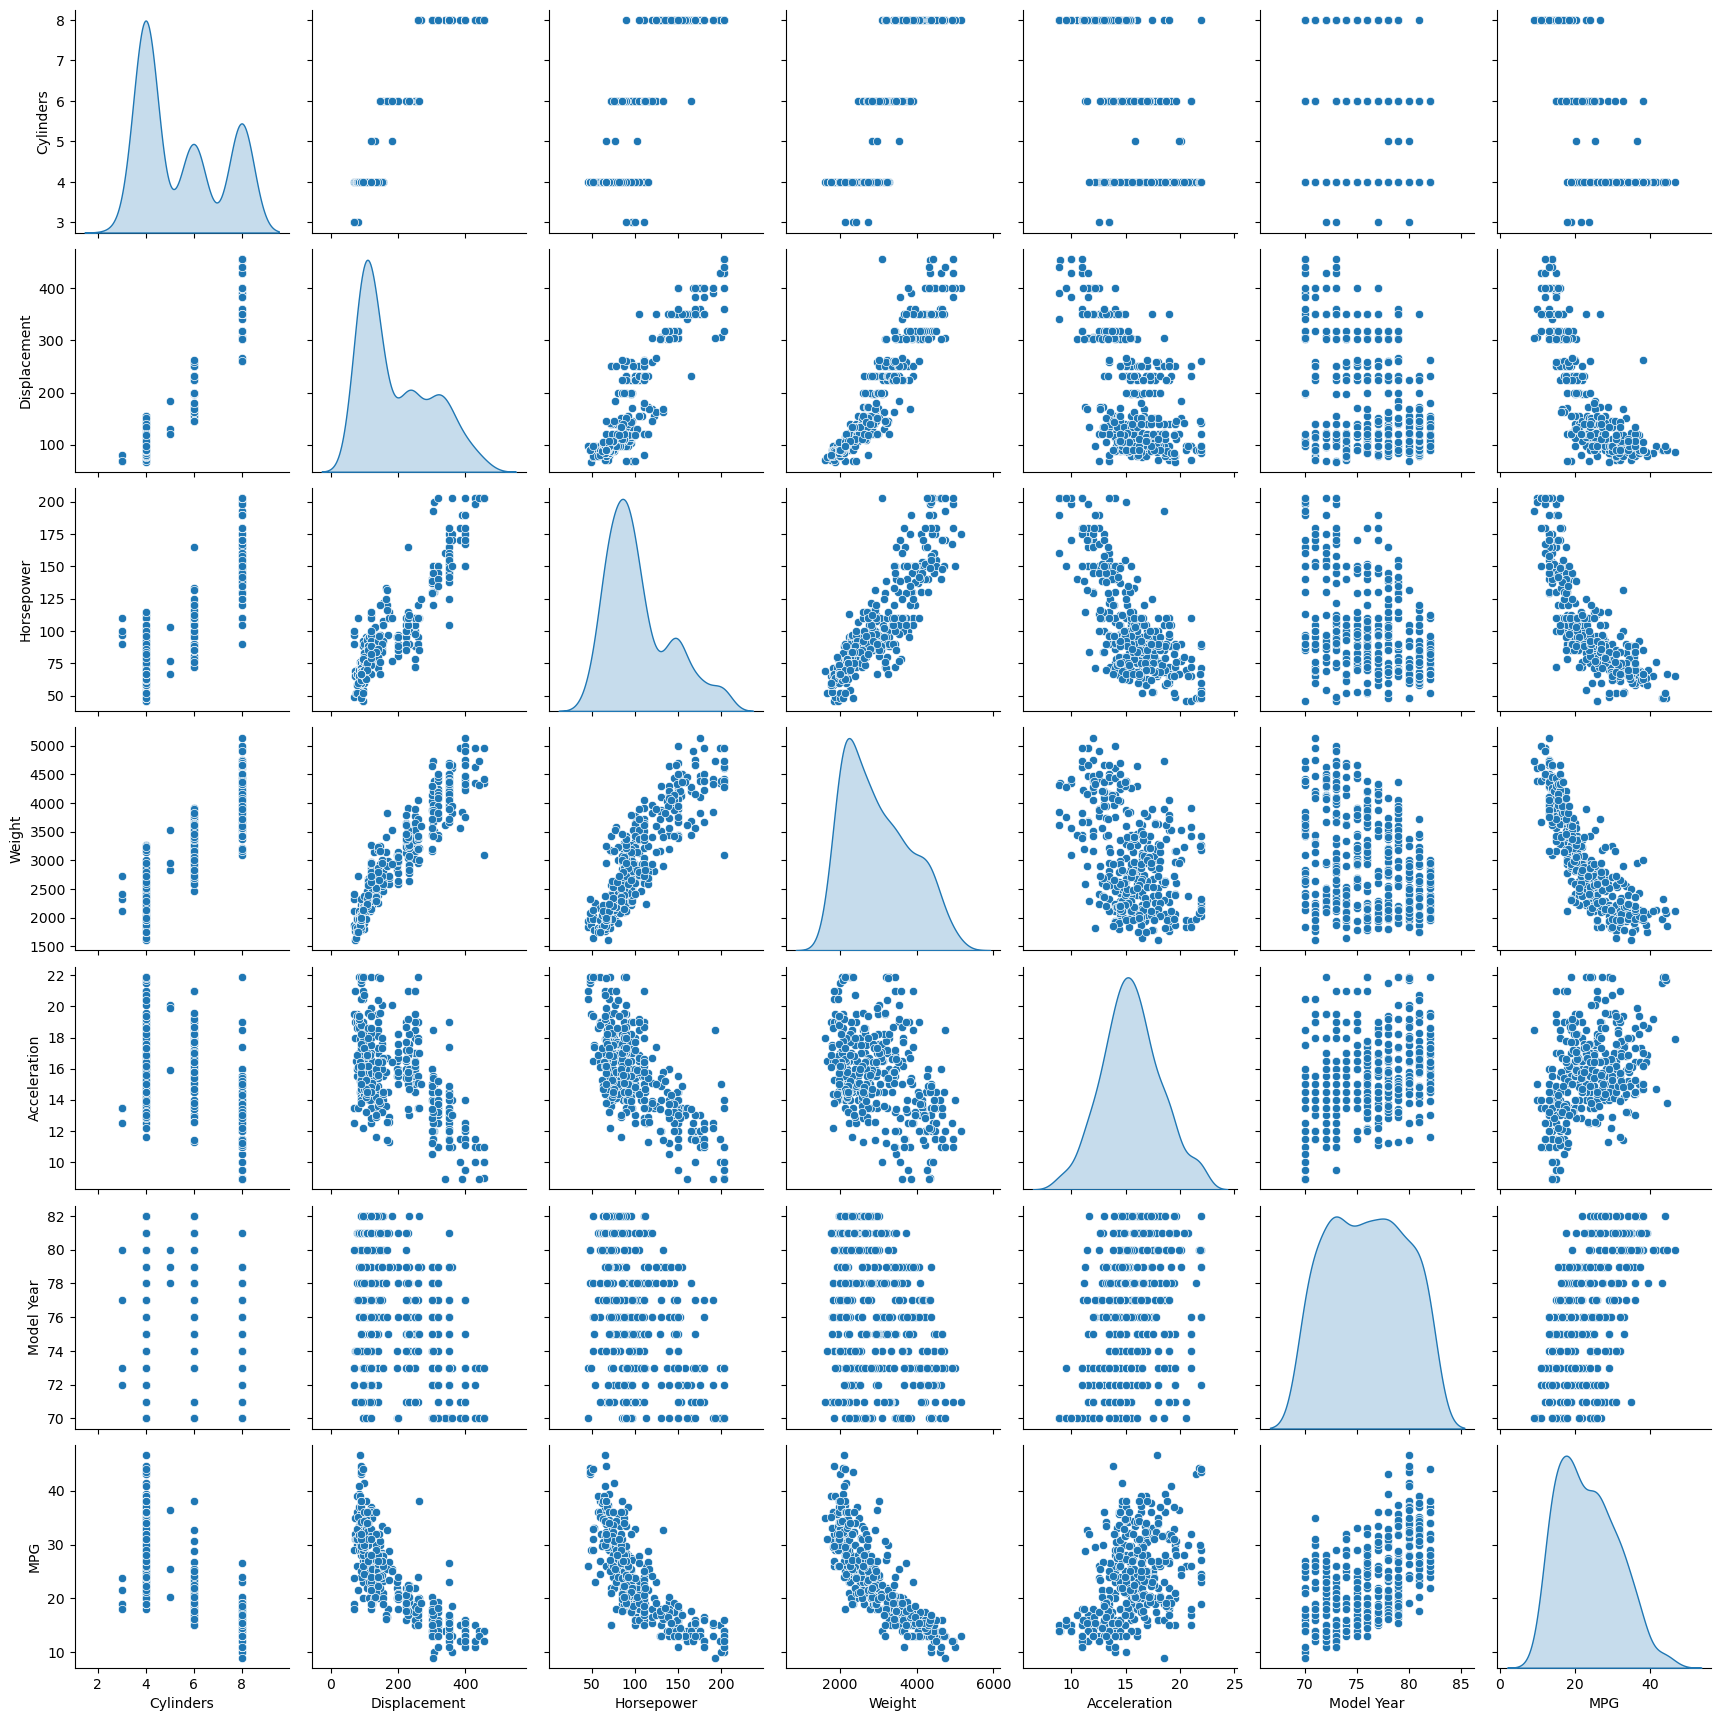

In [19]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')
plt.show()

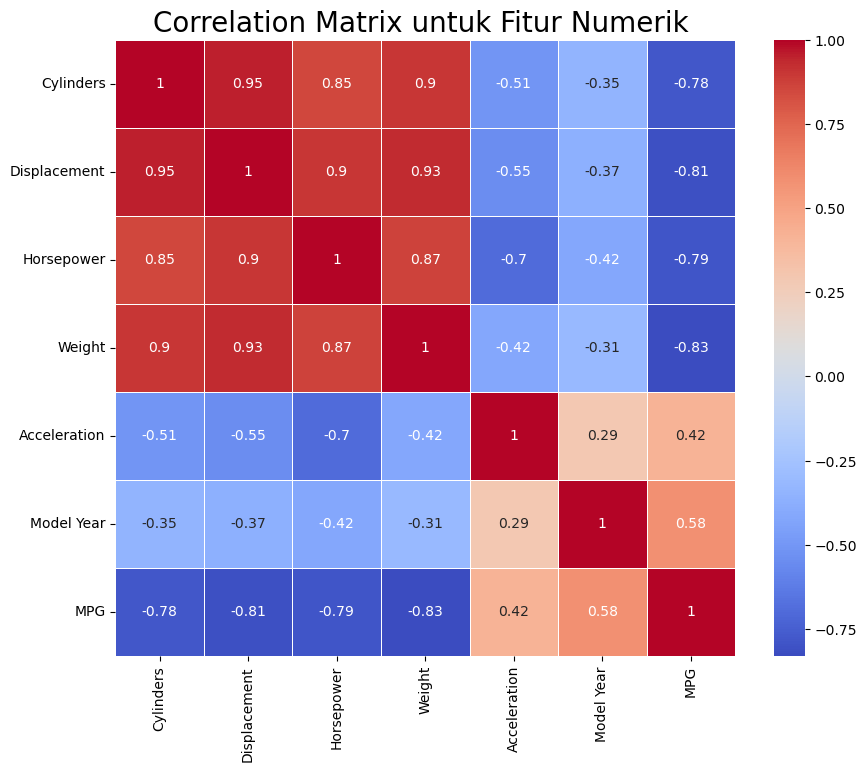

In [20]:
# Memvisualisasikan kolom numerik untuk melihat korelasi antar kolom
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

### Data Preparation

In [21]:
# Mengecheck kembali data
df.head()

,Car Name,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG
0,"chevrolet,chevelle,malibu",8.0,307.0,130.0,3504.0,12.0,70.0,USA,18.0
1,"buick,skylark,320",8.0,350.0,165.0,3693.0,11.5,70.0,USA,15.0
2,"plymouth,satellite",8.0,318.0,150.0,3436.0,11.0,70.0,USA,18.0
3,"amc,rebel,sst",8.0,304.0,150.0,3433.0,12.0,70.0,USA,16.0
4,"ford,torino",8.0,302.0,140.0,3449.0,10.5,70.0,USA,17.0


In [22]:
# Menghapus kolom yang tidak diperlukan
df.drop(columns=['Car Name'], inplace=True)

In [23]:
# Mengubah kolom kategorical menjadi numerikal 
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=float)
df.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,MPG,Europe,Japan,USA
393,4.0,140.0,86.0,2790.0,15.6,82.0,27.0,0.0,0.0,1.0
394,4.0,97.0,52.0,2130.0,21.9,82.0,44.0,1.0,0.0,0.0
395,4.0,135.0,84.0,2295.0,11.6,82.0,32.0,0.0,0.0,1.0
396,4.0,120.0,79.0,2625.0,18.6,82.0,28.0,0.0,0.0,1.0
397,4.0,119.0,82.0,2720.0,19.4,82.0,31.0,0.0,0.0,1.0


In [24]:
# Membagi training dan testing dataset
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [25]:
# Memisahkan antaran features dan labels

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [26]:
# Normalisasi pada features
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[5.4777069e+00 1.9531847e+02 1.0447771e+02 2.9902517e+03 1.5533121e+01
  7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]]


2025-02-20 07:41:54.463248: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [27]:
# Membandingkan antara sebelum dan sesudah normalisasi
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.8  -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


### Model Development

In [28]:
# Membuat model dengan fungsi
def model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [29]:
# Melihat summary model
dnn_model = model(normalizer)
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (314, 9)               │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [30]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.75 s, sys: 298 ms, total: 7.05 s
Wall time: 6.73 s


In [31]:
# Memvisualisasikan hasil training
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  plt.show()

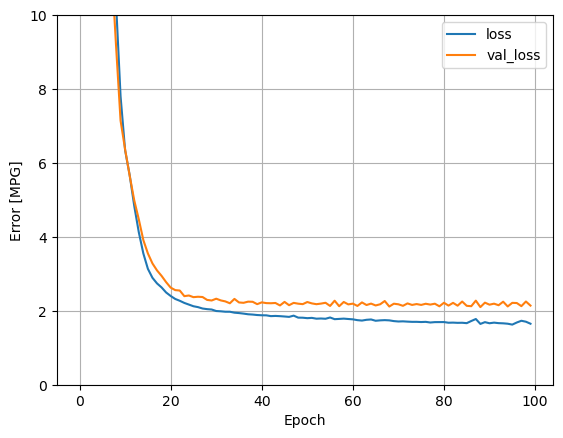

In [32]:
plot_loss(history)

In [33]:
# Melihat nilai Mean Absolute Error (MAE) pada test 
test_results = {}
test_results['model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
model,1.754951


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


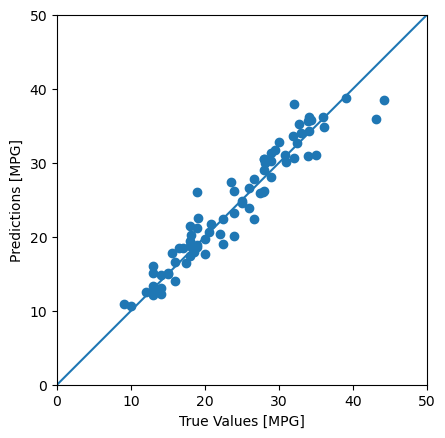

In [34]:
# Memprediksi hasil model
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()


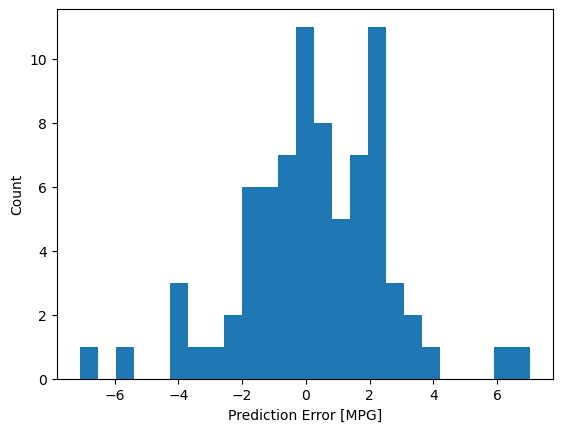

In [35]:
# Mengetahui error dalam model
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')
plt.show()